To summarize the content of this Notebook:
1. Getting data from Spotify using Spotify Web API
2. Data analysis
3. Feature selection
4. Clustering songs using K-Means (and choosing 'k' with the 'Elbow Method')
5. Visualizing these clusters using PCA and t-SNE
6. Insights about each cluster 
7. Using SMOTE to balance data
8. Predicting, with SVM, each songs' cluster

In [1]:
import spotipy #Python library for the Spotify Web API
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
import numpy as np #linear algebra
import pandas as pd #data processing 

In [2]:
#Authentication
from spotipy.oauth2 import SpotifyClientCredentials

#spotify object to access API
# spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(scope=scope, client_id='582a7ae4bd534e93ba02c6fba4e7eea3',
#                                                    client_secret='43fdeb78520142d1899bc49506e1aa26',
#                                                    redirect_uri='http://localhost:1410/'))
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials('582a7ae4bd534e93ba02c6fba4e7eea3', 
                                                                             '43fdeb78520142d1899bc49506e1aa26'))

In [31]:
user = '12167283276' #your own username here
playlists = spotify.user_playlists(user) 
print(type(playlists))

for key in playlists:
    print(key)
    
print('\n')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%s - %s" % (playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = spotify.next(playlists)
    else:
        break

<class 'dict'>
href
items
limit
next
offset
previous
total


spotify:playlist:1kyCPXLTaawIQiGAyDuZ15 - 21to19
spotify:playlist:6pxE2LNjmUt16fV3vBLZ8b - songs2021
spotify:playlist:1GmtdvPoL5xPtVOm7TuMkV - songs2020
spotify:playlist:6ESrXdavo4TM2yoItrgwjV - songs2019
spotify:playlist:5DzrjN5gP1vMbkb78rtsjO - Trucker
spotify:playlist:60TiwliXOThwhpFe3N8XMB - Dirty
spotify:playlist:3SR3bfNSCTHPHGXvvR0Osk - Trail
spotify:playlist:5Ao3MDcveD5rHPHxtZfVdL - High
spotify:playlist:3HDsMDnTk7RecYyOLRcTCp - Rini
spotify:playlist:4JiM8eHAmwi9GsxgAXFuyY - Morning
spotify:playlist:4ZbV8ywYAy8xMkRblHoRZW - Tattoo
spotify:playlist:6brUJdQ83fzi0aUoyPGC0J - Bad Karma
spotify:playlist:0RIxnypNXZEnkj0CxSsSSX - Insomniac
spotify:playlist:7qCUbID5fZiWnzNMIfMFx2 - Study #3 (Middle Out)
spotify:playlist:0nA73b0ByhMFxoQ96vdGPZ - Study #2 (THC)
spotify:playlist:7ctNbiHXnHZLHfLjmvSULd - Hit Me Where It Hurts
spotify:playlist:2Vwhloxm8egSe2GPk5hFcR - The End of the World
spotify:playlist:3zTpEdFp8uMdhHq4yTAVVl - B

In [32]:
chosen_playlist = '1kyCPXLTaawIQiGAyDuZ15' #your own playlist id here
tracks_pt1 = spotify.user_playlist_tracks(user, chosen_playlist, limit=100, offset=0)
tracks_pt2 = spotify.user_playlist_tracks(user, chosen_playlist, limit=100, offset=100)
tracks_pt3 = spotify.user_playlist_tracks(user, chosen_playlist, limit=100, offset=200)
tracklist = tracks_pt1['items'] + tracks_pt2['items'] + tracks_pt3['items']

#Creating data frame with the information from the chosen playlist
data = pd.DataFrame(tracklist)
data

,added_at,added_by,is_local,primary_color,track,video_thumbnail
0,2022-04-19T23:50:48Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
1,2022-04-19T23:50:53Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'compilation', 'artis...",{'url': None}
2,2022-04-19T23:51:18Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
3,2022-04-19T23:51:24Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
4,2022-04-19T23:51:31Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
5,2022-04-19T23:51:38Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
6,2022-04-19T23:51:52Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
7,2022-04-19T23:51:58Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'single', 'artists': ...",{'url': None}
8,2022-04-19T23:52:02Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}
9,2022-04-19T23:52:09Z,{'external_urls': {'spotify': 'https://open.sp...,False,None,"{'album': {'album_type': 'album', 'artists': [...",{'url': None}


In [5]:
data.columns

Index(['added_at', 'added_by', 'is_local', 'primary_color', 'track',
       'video_thumbnail'],
      dtype='object')

In [6]:
data.iloc[:,4].describe

<bound method NDFrame.describe of 0    {'album': {'album_type': 'album', 'artists': [...
1    {'album': {'album_type': 'album', 'artists': [...
2    {'album': {'album_type': 'album', 'artists': [...
3    {'album': {'album_type': 'album', 'artists': [...
4    {'album': {'album_type': 'album', 'artists': [...
5    {'album': {'album_type': 'single', 'artists': ...
6    {'album': {'album_type': 'album', 'artists': [...
7    {'album': {'album_type': 'album', 'artists': [...
8    {'album': {'album_type': 'single', 'artists': ...
9    {'album': {'album_type': 'album', 'artists': [...
Name: track, dtype: object>

In [7]:
playlist_info = []
for k,v in enumerate(tracklist):
    info = v['track']
    playlist_info.append((info['name'], info['artists'][0]['name'], info['album']['name'], info['album']['id']))

print(playlist_info)

[('Levitating', 'Dua Lipa', 'Future Nostalgia', '7fJJK56U9fHixgO0HQkhtI'), ('Save Your Tears', 'The Weeknd', 'After Hours', '4yP0hdKOZPNshxUOjY0cZj'), ('Blinding Lights', 'The Weeknd', 'After Hours', '4yP0hdKOZPNshxUOjY0cZj'), ('Mood (feat. iann dior)', '24kGoldn', 'El Dorado', '270o30h7cAlEhBnbuSpFZq'), ('good 4 u', 'Olivia Rodrigo', 'SOUR', '6s84u2TUpR3wdUv4NgKA2j'), ('Kiss Me More (feat. SZA)', 'Doja Cat', 'Kiss Me More (feat. SZA)', '1OnzqJTL9bwe4kvaLxRYxt'), ('Leave The Door Open', 'Bruno Mars', 'An Evening With Silk Sonic', '4VZ7jhV0wHpoNPCB7Vmiml'), ('drivers license', 'Olivia Rodrigo', 'SOUR', '6s84u2TUpR3wdUv4NgKA2j'), ('MONTERO (Call Me By Your Name)', 'Lil Nas X', 'MONTERO (Call Me By Your Name)', '2Hjcfw8zHN4dJDZJGOzLd6'), ('Peaches (feat. Daniel Caesar & Giveon)', 'Justin Bieber', 'Justice', '5dGWwsZ9iB2Xc3UKR0gif2')]


In [8]:
playlist_df = pd.DataFrame(playlist_info, columns=('Song', 'Artist', 'Album', 'Id'))
playlist_df.head()

,Song,Artist,Album,Id
0,Levitating,Dua Lipa,Future Nostalgia,7fJJK56U9fHixgO0HQkhtI
1,Save Your Tears,The Weeknd,After Hours,4yP0hdKOZPNshxUOjY0cZj
2,Blinding Lights,The Weeknd,After Hours,4yP0hdKOZPNshxUOjY0cZj
3,Mood (feat. iann dior),24kGoldn,El Dorado,270o30h7cAlEhBnbuSpFZq
4,good 4 u,Olivia Rodrigo,SOUR,6s84u2TUpR3wdUv4NgKA2j


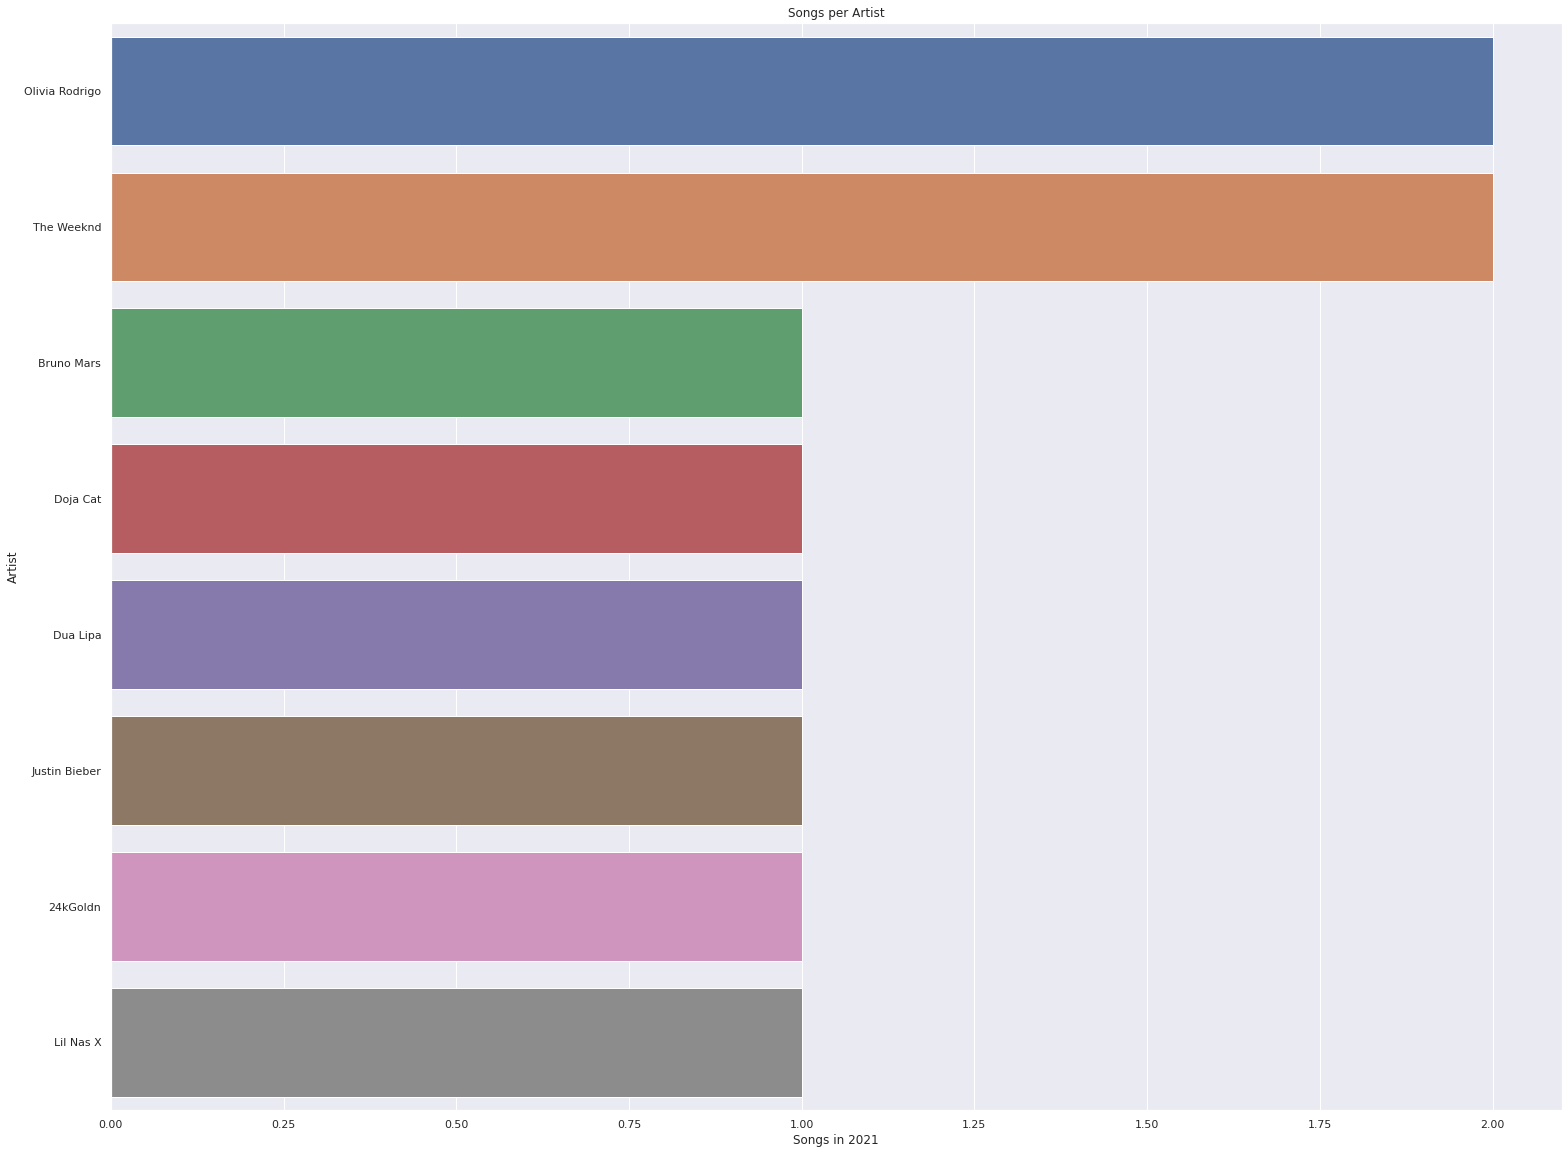

In [33]:
fav_artists = playlist_df['Artist'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(y=playlist_df['Artist'], order=fav_artists)
plt.xlabel('Songs in 2021')
plt.title('Songs per Artist')
sns.set(rc={'figure.figsize':(26,20)})

Text(0.5, 1.0, 'Songs per Album in 2021')

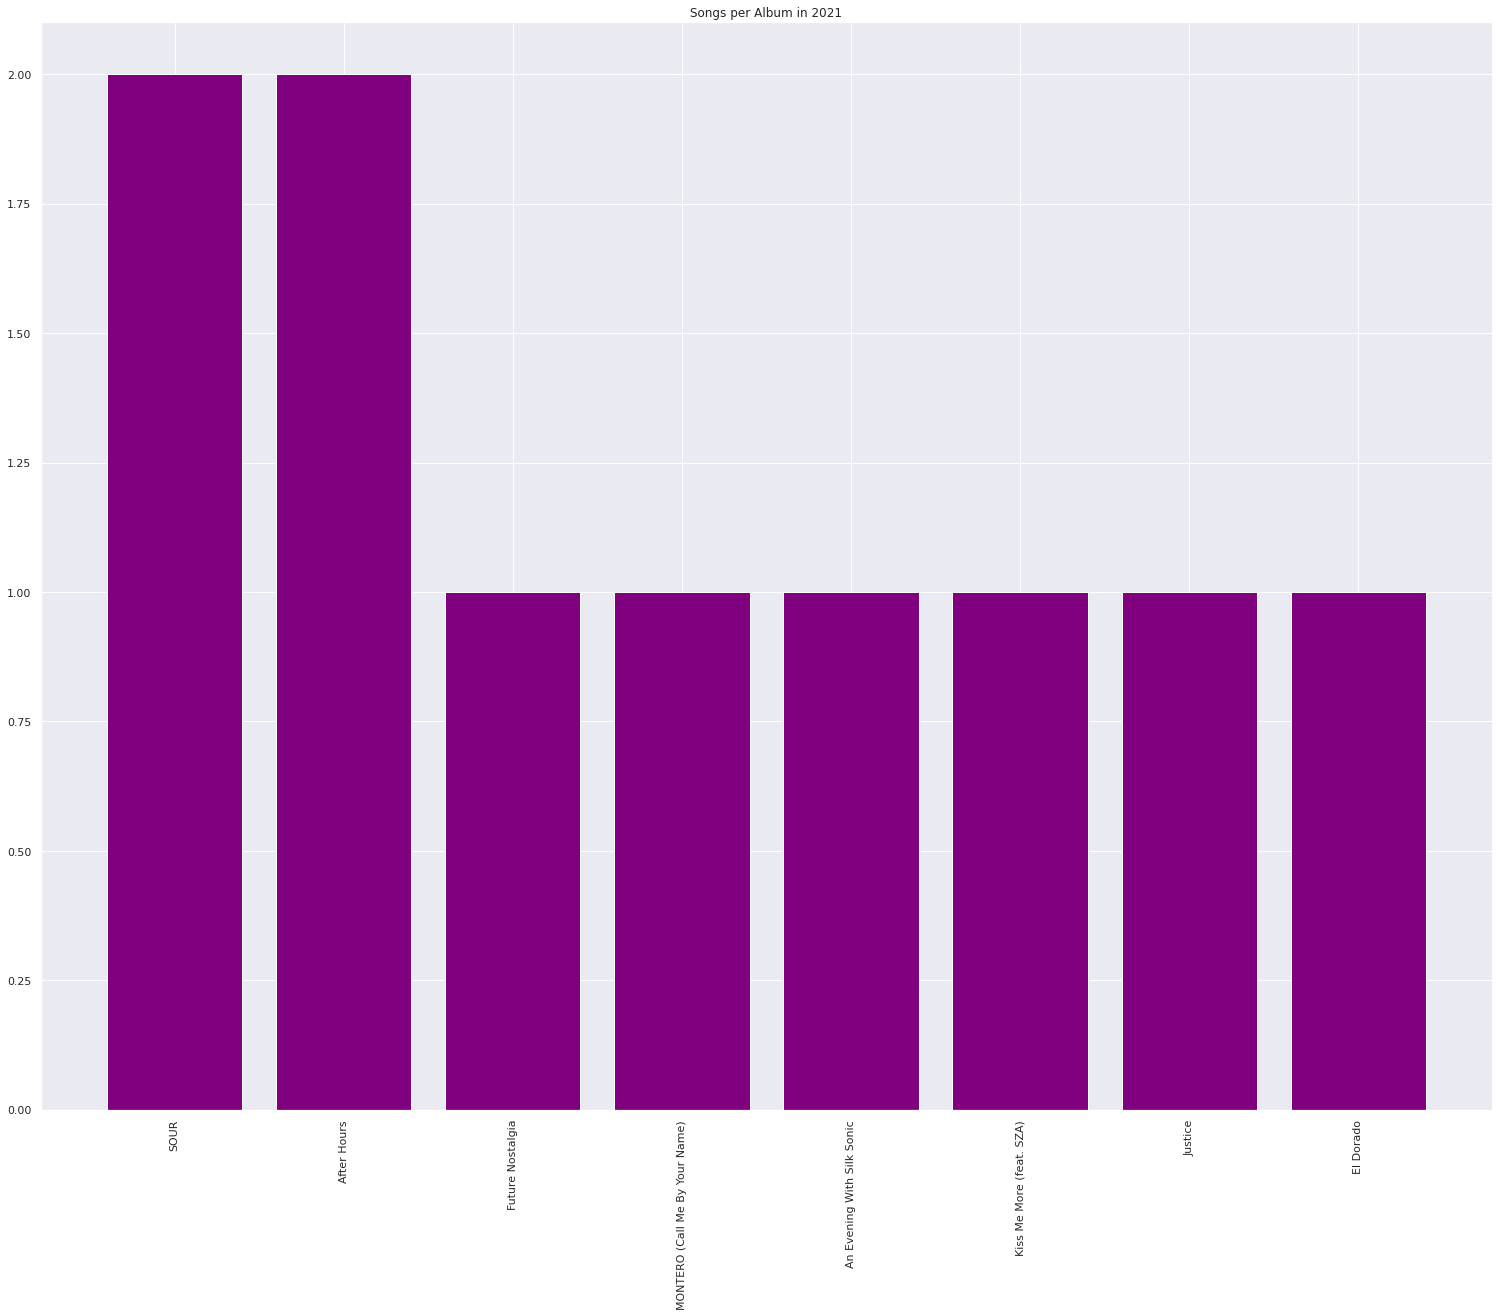

In [34]:
ax = plt.bar(playlist_df['Album'].value_counts().head(10).keys(), playlist_df['Album'].value_counts().head(10),
            color='purple')
plt.xticks(rotation=90)
plt.title('Songs per Album in 2021')

In [144]:
#Grabbing audio features for each song
audio_features_names = []
audio_features_ids = []
audio_features_artists = []
#Iterating over 'tracklist' in order to create some lists which will be on our audio features data frame
for k,v in enumerate(tracklist):
    info = v['track']
    audio_features_names.append(info['name'])
    audio_features_ids.append(info['id'])
    audio_features_artists.append(info['artists'][0]['name'])
    
audio_features_pt1 = []
# audio_features_pt2 = []
# audio_features_pt3 = []
# audio_features_pt4 = []
# audio_features_pt5 = []
# audio_features_pt6 = []
for i in range(len(audio_features_ids)):
    print(i)
    if i < 50:
        audio_features_pt1.append(audio_features_ids[i])
    elif i < 100:
        audio_features_pt2.append(audio_features_ids[i])
    elif i < 150:
        audio_features_pt3.append(audio_features_ids[i])
    elif i < 200:
        audio_features_pt4.append(audio_features_ids[i])
    elif i < 250:
        audio_features_pt5.append(audio_features_ids[i])
    elif i < 300:
        audio_features_pt6.append(audio_features_ids[i])



#Get audio features for one or multiple tracks based upon their Spotify IDs: audio_features(tracks=[])
#tracks - a list of track URIs, URLs or IDs, maximum: 50 ids
audio_features1 = spotify.audio_features(audio_features_pt1)
# audio_features2 = spotify.audio_features(audio_features_pt2)
# audio_features3 = spotify.audio_features(audio_features_pt3)
# audio_features4 = spotify.audio_features(audio_features_pt4)
# audio_features5 = spotify.audio_features(audio_features_pt5)
# audio_features6 = spotify.audio_features(audio_features_pt6)

#audio_features = audio_features1+audio_features2+audio_features3+audio_features4+audio_features5+audio_features6
audio_features = audio_features1
audio_features

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


[{'danceability': 0.878,
  'energy': 0.619,
  'key': 6,
  'loudness': -5.56,
  'mode': 1,
  'speechiness': 0.102,
  'acousticness': 0.0533,
  'instrumentalness': 0,
  'liveness': 0.113,
  'valence': 0.639,
  'tempo': 136.041,
  'type': 'audio_features',
  'id': '2YpeDb67231RjR0MgVLzsG',
  'uri': 'spotify:track:2YpeDb67231RjR0MgVLzsG',
  'track_href': 'https://api.spotify.com/v1/tracks/2YpeDb67231RjR0MgVLzsG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2YpeDb67231RjR0MgVLzsG',
  'duration_ms': 157067,
  'time_signature': 4},
 {'danceability': 0.76,
  'energy': 0.479,
  'key': 2,
  'loudness': -5.574,
  'mode': 1,
  'speechiness': 0.0466,
  'acousticness': 0.556,
  'instrumentalness': 0,
  'liveness': 0.0703,
  'valence': 0.913,
  'tempo': 89.911,
  'type': 'audio_features',
  'id': '3KkXRkHbMCARz0aVfEt68P',
  'uri': 'spotify:track:3KkXRkHbMCARz0aVfEt68P',
  'track_href': 'https://api.spotify.com/v1/tracks/3KkXRkHbMCARz0aVfEt68P',
  'analysis_url': 'https://api.spotify.

In [121]:
#Creating audio features data frame
#audio_features_df = pd.DataFrame(audio_features) 

# audio_features_df.insert(0, "track", audio_features_names, True) #using insert() to add a column to our data frame
# audio_features_df.insert(1, "artist", audio_features_artists, True)
#audio_features_df.head(30)
#audio_features_df.to_csv("audFeaturesCSV.csv")
audio_features_df = pd.read_csv("audFeatCSV.csv") 
audio_features_df.head(30)

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year
0,1,Old Town Road Lil Nas X Billy Ray Cyrus,Old Town Road - Remix,Lil Nas X,0.619,0.878,0.1130,0.639,136.041,0.000000,0.05330,81,"['lgbtq+ hip hop', 'pop']",0.431344,2019
1,2,Sunflower Post Malone and Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.479,0.760,0.0703,0.913,89.911,0.000000,0.55600,84,"['dfw rap', 'melodic rap', 'rap']",0.325720,2019
2,3,Without Me Halsey,Without Me,Halsey,0.488,0.752,0.0936,0.533,136.041,0.000009,0.29700,79,"['dance pop', 'electropop', 'etherpop', 'indie...",0.392288,2019
3,4,Bad Guy Billie Eilish,bad guy,Billie Eilish,0.425,0.701,0.1000,0.562,135.128,0.130000,0.32800,85,"['art pop', 'electropop', 'pop']",0.000000,2019
4,5,Wow Post Malone,Wow.,Post Malone,0.539,0.829,0.1030,0.388,99.960,0.000002,0.13600,80,"['dfw rap', 'melodic rap', 'rap']",0.779044,2019
5,6,Happier Marshmello and Bastille,Happier,Marshmello,0.792,0.687,0.1670,0.671,100.011,0.000000,0.19100,25,"['brostep', 'dance pop', 'edm', 'pop', 'pop da...",0.662268,2019
6,7,7 Rings Ariana Grande,7 rings,Ariana Grande,0.317,0.778,0.0881,0.327,140.048,0.000000,0.59200,85,"['dance pop', 'pop']",0.659706,2019
7,8,Talk Khalid,Talk (feat. Disclosure),Khalid,0.400,0.900,0.0599,0.346,135.984,0.000000,0.05160,73,"['pop', 'pop r&b']",0.334460,2019
8,9,Sicko Mode Travis Scott,SICKO MODE,Travis Scott,0.730,0.834,0.1240,0.446,155.008,0.000000,0.00513,83,"['hip hop', 'rap', 'slap house']",0.506228,2019
9,10,Sucker Jonas Brothers,Sucker,Jonas Brothers,0.734,0.842,0.1060,0.952,137.958,0.000000,0.04270,81,"['boy band', 'dance pop', 'pop', 'post-teen pop']",0.313236,2019


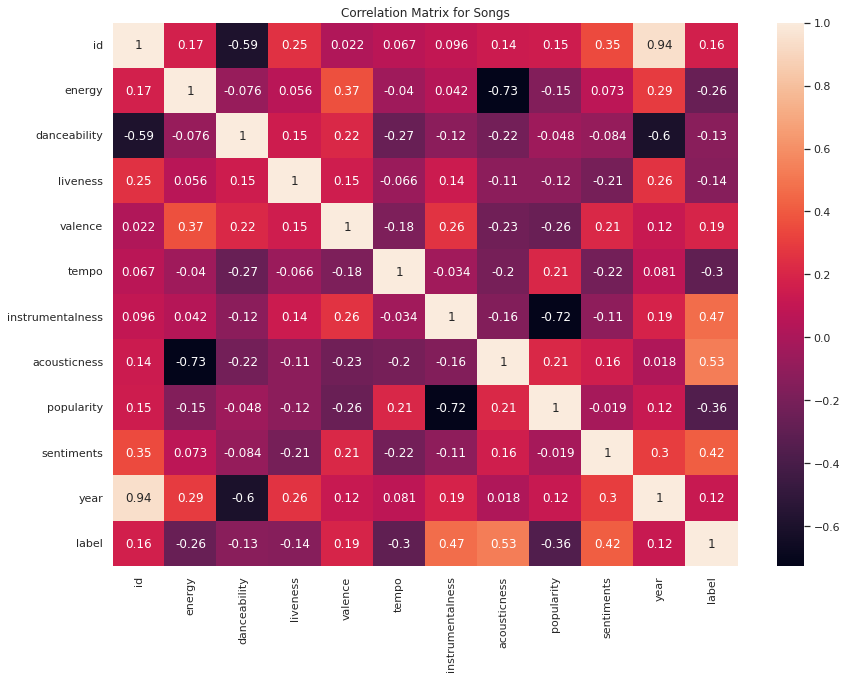

In [143]:
#Feature analysis
correlation_matrix = audio_features_df.corr()
ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True) #annot: if True, write the data value in each cell.
plt.title('Correlation Matrix for Songs')
plt.show()

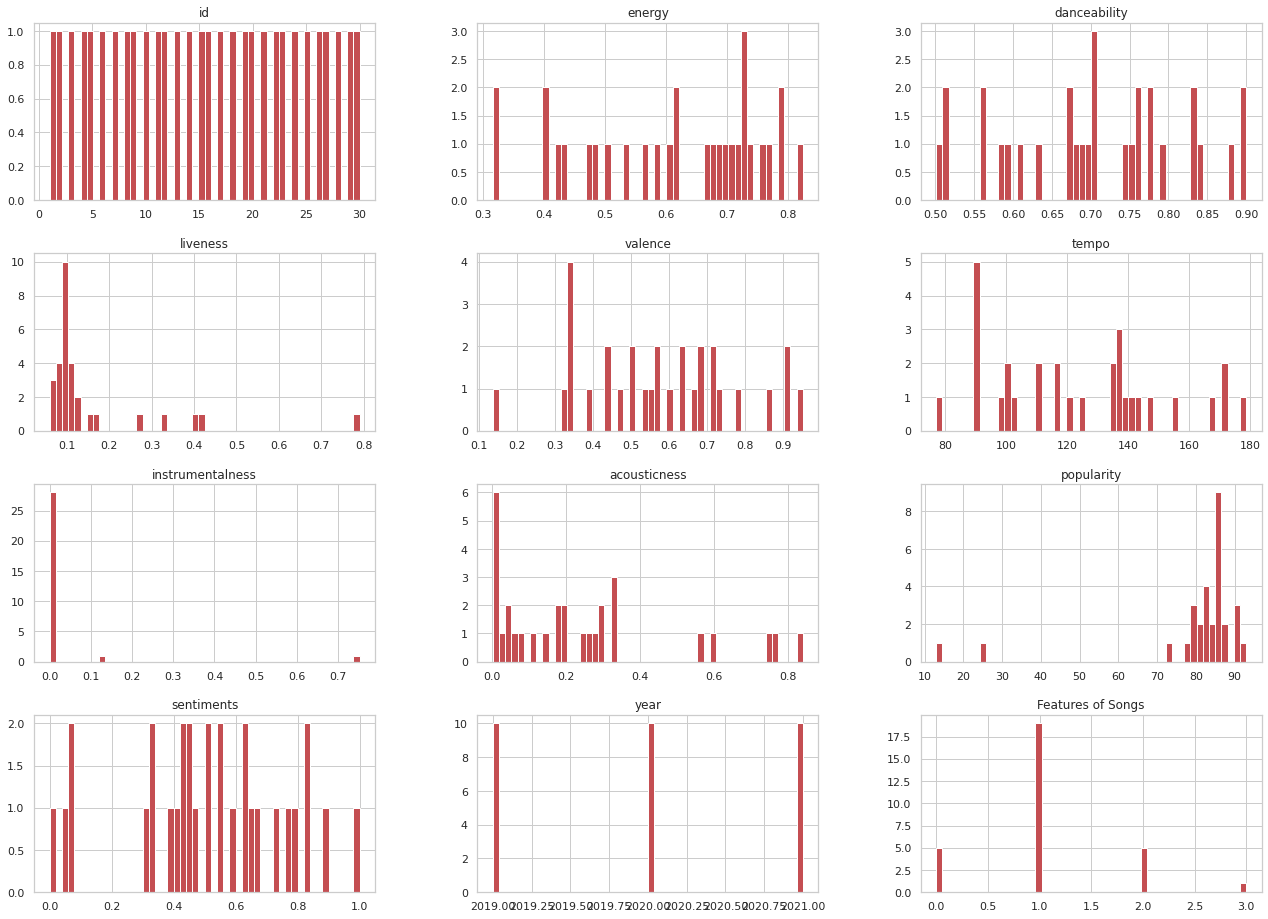

In [142]:
audio_features_df.hist(bins=50, figsize=(22,16), color='r')
plt.title('Features of Songs')
plt.show()

In [141]:
#Chosen features (after analyzing both the heatmap and histogram above)
features = ['energy', 'danceability', 'liveness', 'valence',  'instrumentalness', 'acousticness', 'sentiments']

audio_features_df.loc[:, features].mean()

energy              0.610933
danceability        0.704567
liveness            0.157070
valence             0.575867
instrumentalness    0.029492
acousticness        0.237789
sentiments          0.510772
dtype: float64

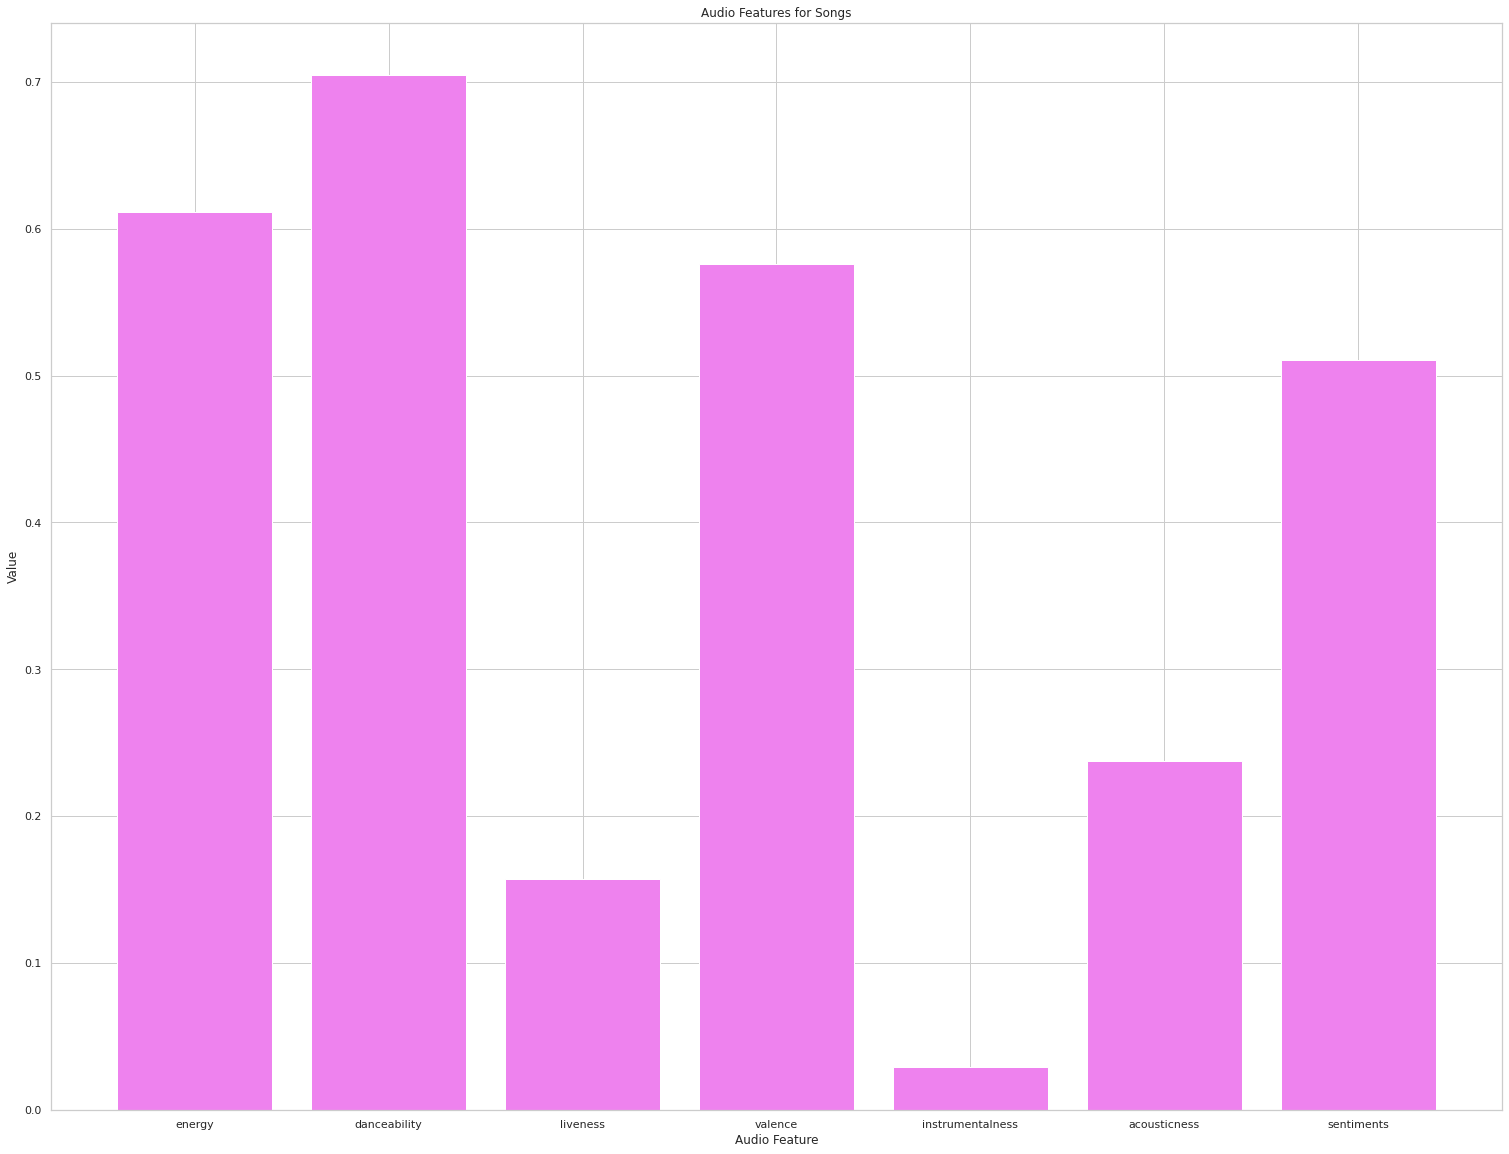

In [140]:
ax = plt.bar(audio_features_df.loc[:, features].mean().keys(), audio_features_df.loc[:, features].mean(), 
             color='violet')
plt.xlabel('Audio Feature')
plt.ylabel('Value')
plt.title('Audio Features for Songs')
plt.show()

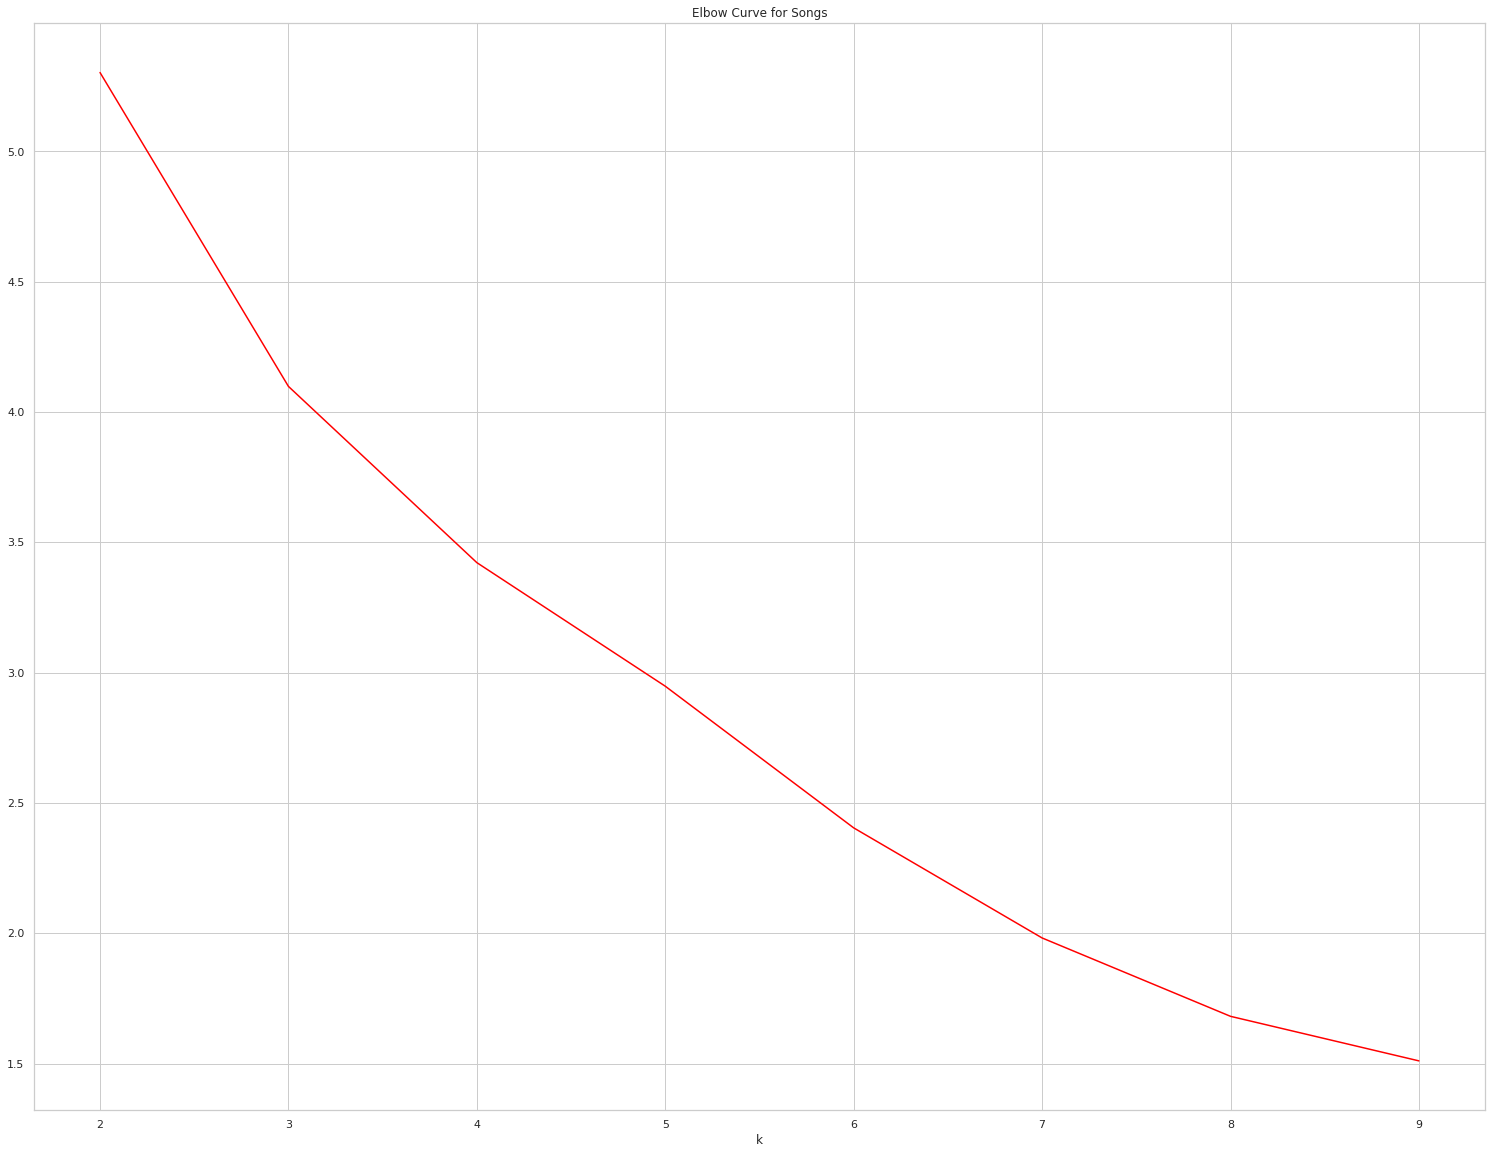

In [139]:
#Clustering songs
from sklearn.cluster import KMeans

#In order to cluster the songs, we are going to use KMeans algorithm, which finds a certain (predefined) 'k'
#number of clusters (group of data points that are grouped together due to similarities in their features) 
#in a set of data
#We are going to use the 'Elbow method' to find an optimal number of clusters 'k'
X = audio_features_df[features]
distorsions = []
for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(X)
    distorsions.append(model.inertia_)

plt.plot(range(2,10), distorsions, color='red')
plt.grid(True)
plt.xlabel('k')
plt.title('Elbow Curve for Songs')
plt.show()

In [138]:
#Training data
X = audio_features_df[features]
model = KMeans(n_clusters=4)
model.fit(X)

y = model.predict(X) #Each song goes to the cluster which has the most similarities in their features
y

array([1, 3, 1, 2, 1, 3, 0, 1, 1, 3, 2, 1, 2, 3, 1, 1, 1, 0, 1, 0, 3, 3,
       2, 3, 3, 3, 3, 0, 3, 2], dtype=int32)

In [137]:
centers = model.cluster_centers_
centers

array([[5.70285714e-01, 7.41714286e-01, 1.46542857e-01, 4.38571429e-01,
        1.55571429e-06, 2.00171429e-01, 5.07218564e-01],
       [7.30571429e-01, 7.83142857e-01, 1.06628571e-01, 6.59857143e-01,
        3.62314286e-04, 8.40185714e-02, 4.90706018e-01],
       [4.52000000e-01, 7.30500000e-01, 8.51500000e-02, 7.37500000e-01,
        6.50000000e-02, 4.42000000e-01, 1.62859937e-01],
       [5.86000000e-01, 8.96000000e-01, 7.90000000e-01, 6.42000000e-01,
        0.00000000e+00, 1.04000000e-01, 4.10286323e-02],
       [4.18000000e-01, 5.31000000e-01, 1.05500000e-01, 2.91500000e-01,
        7.10000000e-06, 7.59500000e-01, 5.01499931e-01],
       [7.30000000e-01, 5.14000000e-01, 8.97000000e-02, 3.34000000e-01,
        9.54000000e-05, 1.46000000e-03, 7.77707413e-02],
       [6.76000000e-01, 6.31000000e-01, 2.78000000e-01, 8.62000000e-01,
        7.52000000e-01, 1.76000000e-02, 4.45694960e-01],
       [6.86000000e-01, 6.38666667e-01, 1.90166667e-01, 7.39166667e-01,
        3.46944695e-18, 1

/home/shubham/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/shubham/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


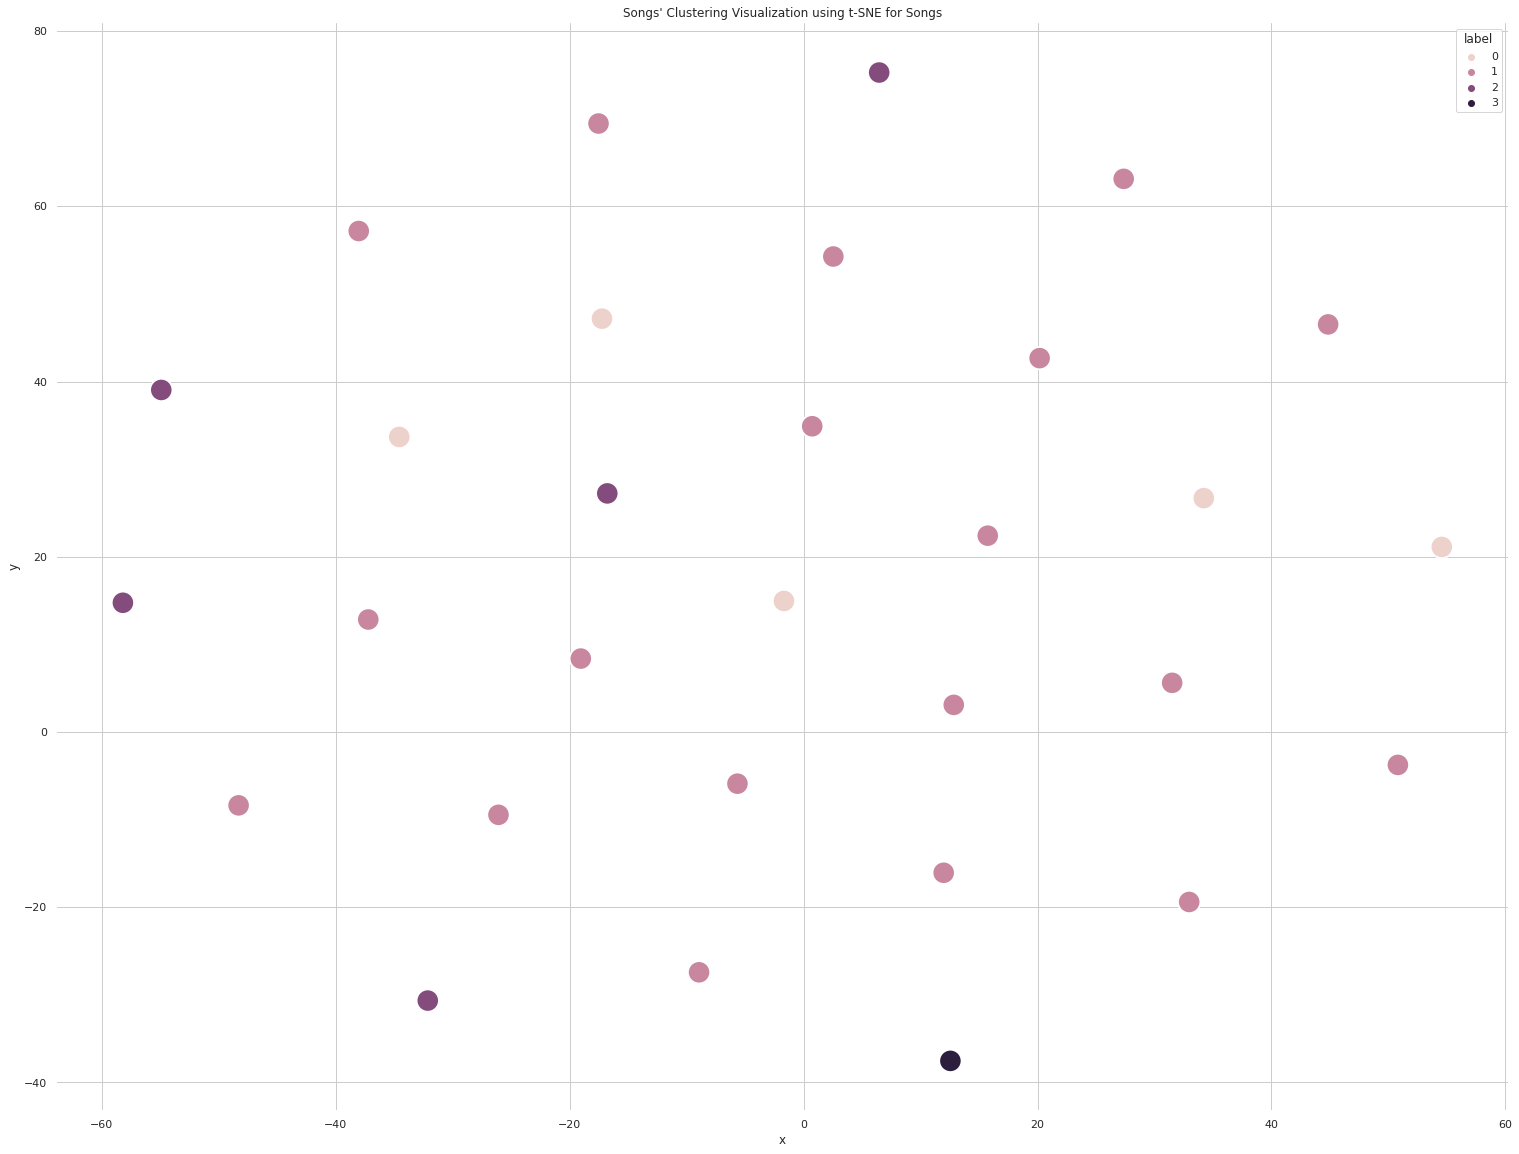

In [136]:
#Since we are working with 6 features, we are going to apply dimensionality reduction techniques in order 
#to visualize our data in 2d. We are going to test PCA and t-SNE algorithms
#t-SNE seeks to preserve small pairwise distances 

from sklearn.manifold import TSNE

tsne_obj = TSNE()
tsne = tsne_obj.fit_transform(X)

tsne_df = pd.DataFrame(tsne, columns=['x', 'y'])
tsne_df['label'] = y

sns.set_style("whitegrid")
sns.scatterplot(data=tsne_df, x='x', y='y', hue='label', s=500)
sns.despine(left=True, bottom=True)
plt.title("Songs' Clustering Visualization using t-SNE for Songs")
plt.show()

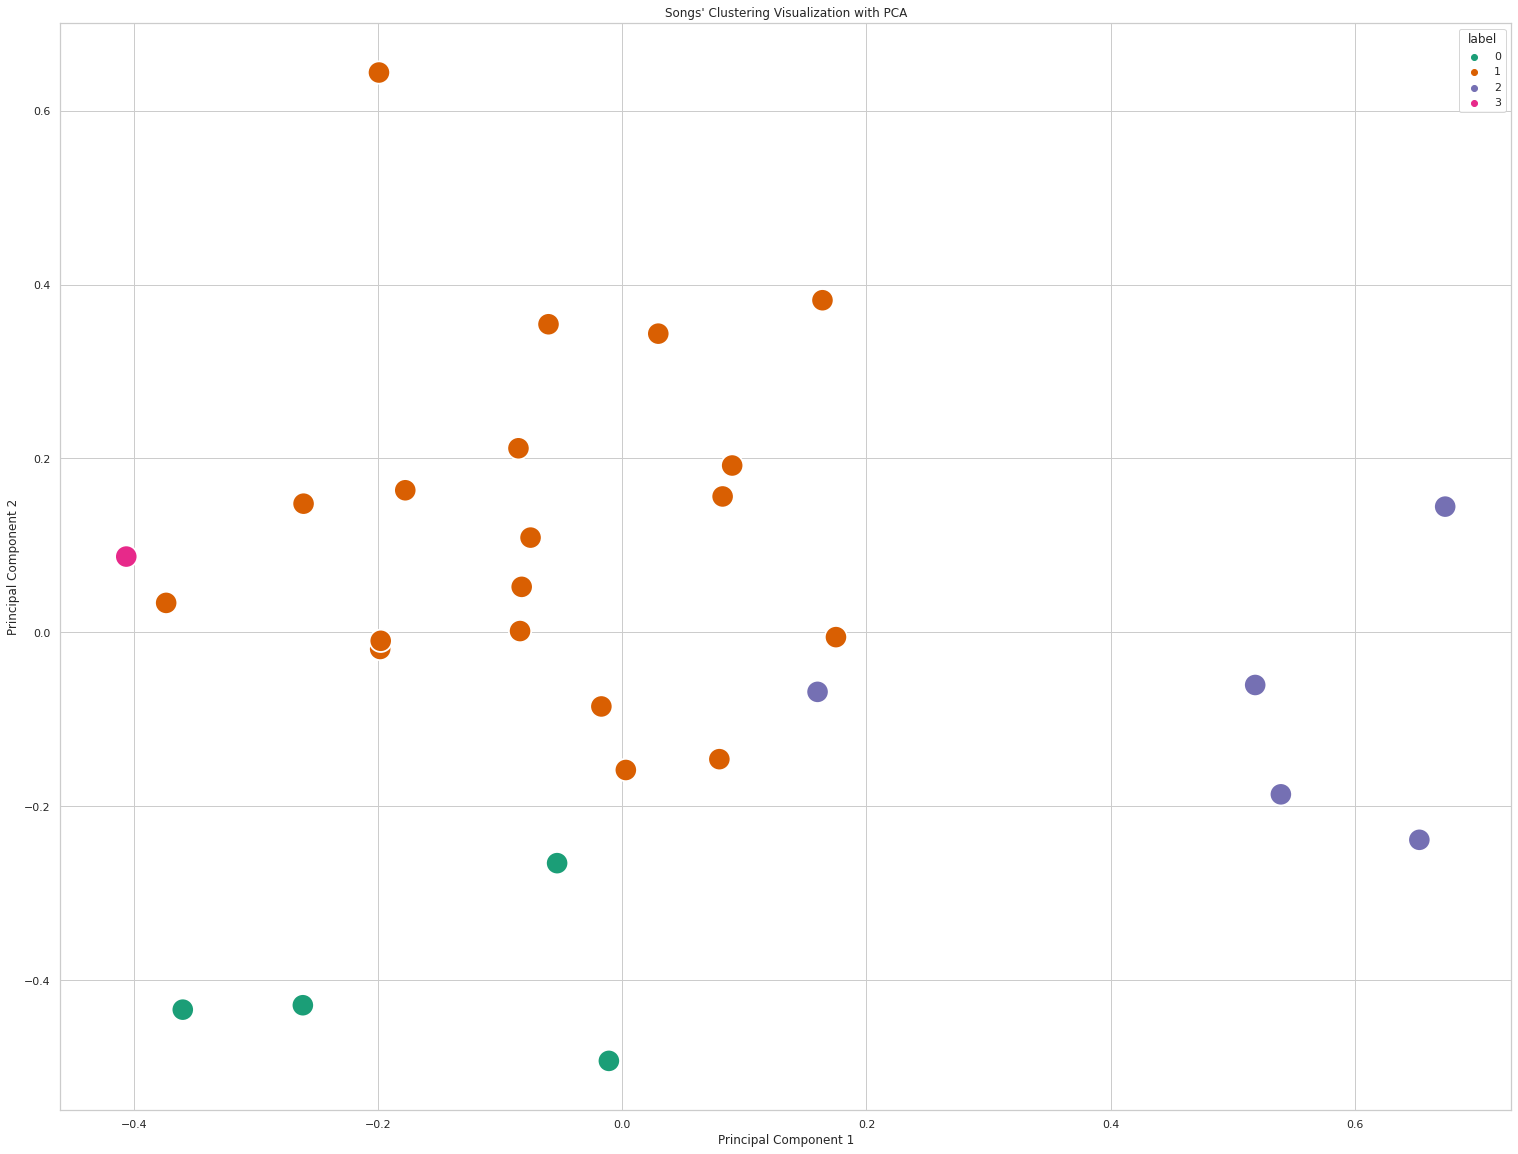

In [135]:
#PCA seeks to preserve large pairwise distances to maximize variance

from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2 dimensions
pc = pca.fit_transform(X) #Fit the model with X and apply the dimensionality reduction on X

#Creating a data frame with the results from the dimensionality reduction (in order to display the data in 2d)
pca_df = pd.DataFrame(pc, columns=['Principal Component 1', 'Principal Component 2']) 
pca_df['label'] = y

sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2', hue='label', palette='Dark2',s=500)
plt.title("Songs' Clustering Visualization with PCA")
plt.show()

/home/shubham/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


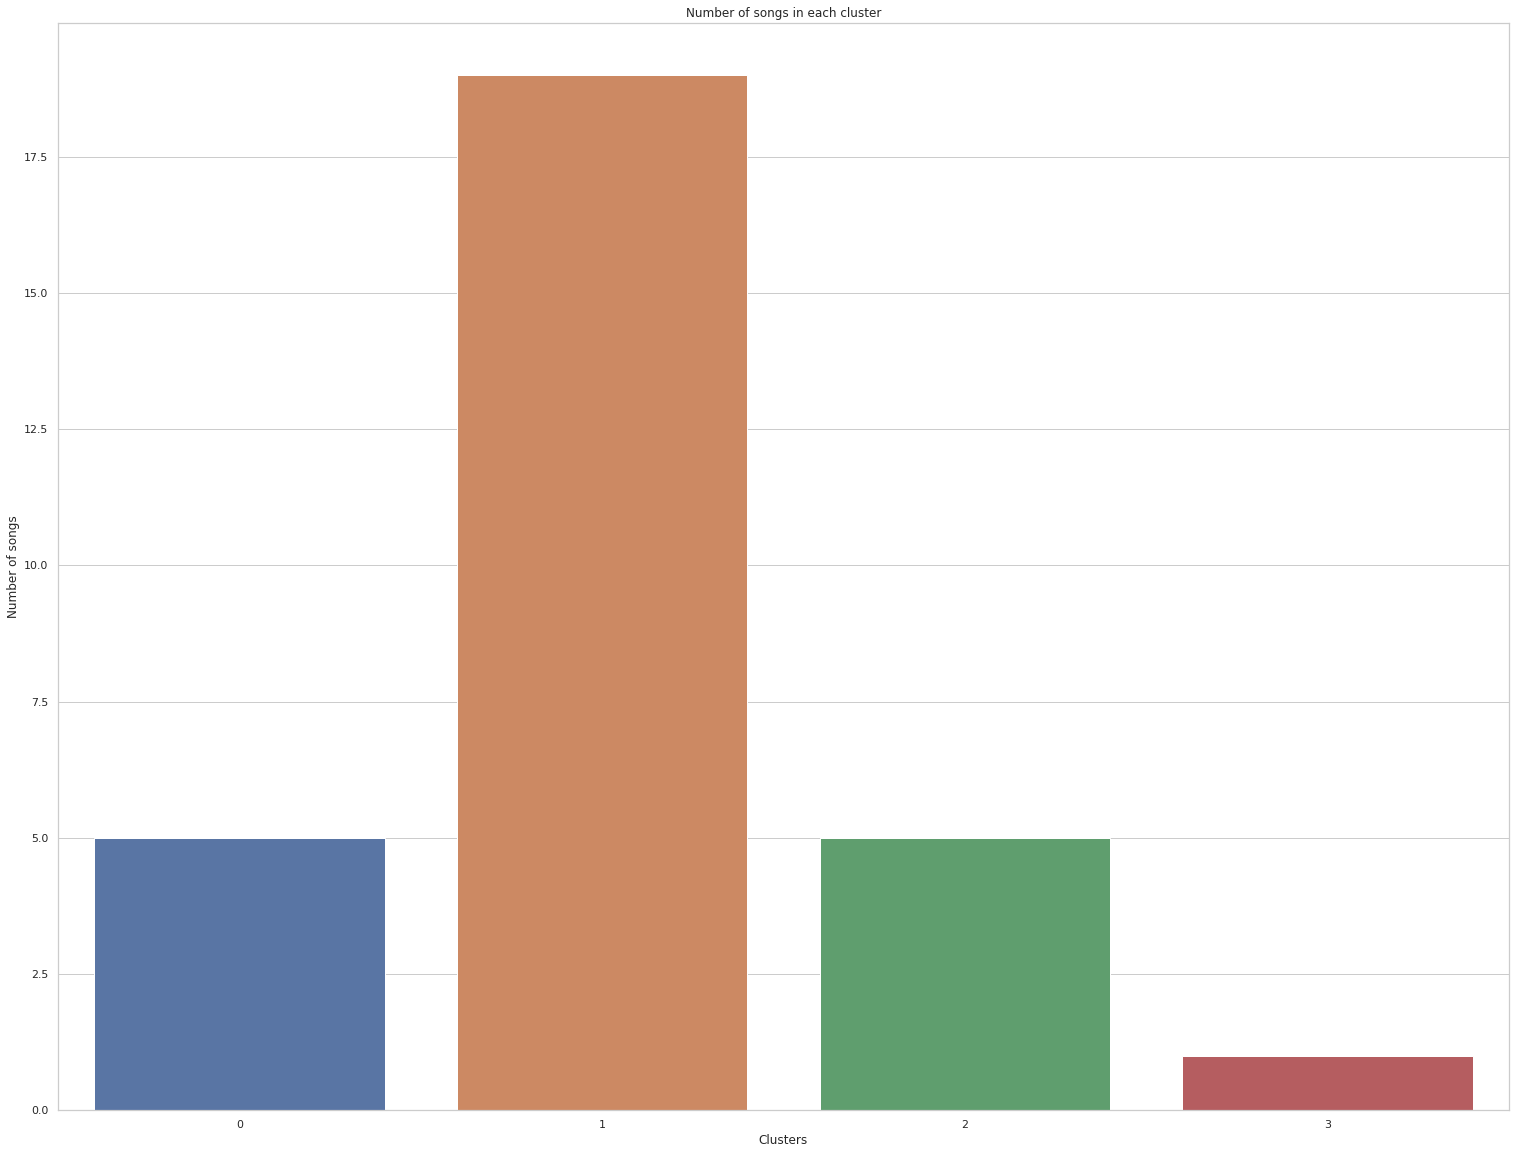

In [123]:
sns.countplot(y)
plt.xlabel('Clusters')
plt.ylabel('Number of songs')
plt.title('Number of songs in each cluster')
plt.show()

In [124]:
#Our data frame now has a target column (indicating the cluster in which each song is grouped)
audio_features_df.loc[:, 'label'] = y
audio_features_df.head(30)

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year,label
0,1,Old Town Road Lil Nas X Billy Ray Cyrus,Old Town Road - Remix,Lil Nas X,0.619,0.878,0.1130,0.639,136.041,0.000000,0.05330,81,"['lgbtq+ hip hop', 'pop']",0.431344,2019,1
1,2,Sunflower Post Malone and Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.479,0.760,0.0703,0.913,89.911,0.000000,0.55600,84,"['dfw rap', 'melodic rap', 'rap']",0.325720,2019,2
2,3,Without Me Halsey,Without Me,Halsey,0.488,0.752,0.0936,0.533,136.041,0.000009,0.29700,79,"['dance pop', 'electropop', 'etherpop', 'indie...",0.392288,2019,1
3,4,Bad Guy Billie Eilish,bad guy,Billie Eilish,0.425,0.701,0.1000,0.562,135.128,0.130000,0.32800,85,"['art pop', 'electropop', 'pop']",0.000000,2019,0
4,5,Wow Post Malone,Wow.,Post Malone,0.539,0.829,0.1030,0.388,99.960,0.000002,0.13600,80,"['dfw rap', 'melodic rap', 'rap']",0.779044,2019,1
5,6,Happier Marshmello and Bastille,Happier,Marshmello,0.792,0.687,0.1670,0.671,100.011,0.000000,0.19100,25,"['brostep', 'dance pop', 'edm', 'pop', 'pop da...",0.662268,2019,1
6,7,7 Rings Ariana Grande,7 rings,Ariana Grande,0.317,0.778,0.0881,0.327,140.048,0.000000,0.59200,85,"['dance pop', 'pop']",0.659706,2019,2
7,8,Talk Khalid,Talk (feat. Disclosure),Khalid,0.400,0.900,0.0599,0.346,135.984,0.000000,0.05160,73,"['pop', 'pop r&b']",0.334460,2019,0
8,9,Sicko Mode Travis Scott,SICKO MODE,Travis Scott,0.730,0.834,0.1240,0.446,155.008,0.000000,0.00513,83,"['hip hop', 'rap', 'slap house']",0.506228,2019,1
9,10,Sucker Jonas Brothers,Sucker,Jonas Brothers,0.734,0.842,0.1060,0.952,137.958,0.000000,0.04270,81,"['boy band', 'dance pop', 'pop', 'post-teen pop']",0.313236,2019,1


[4, 8, 11, 13, 23]


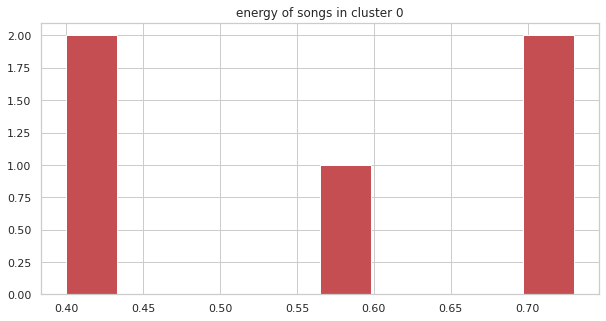

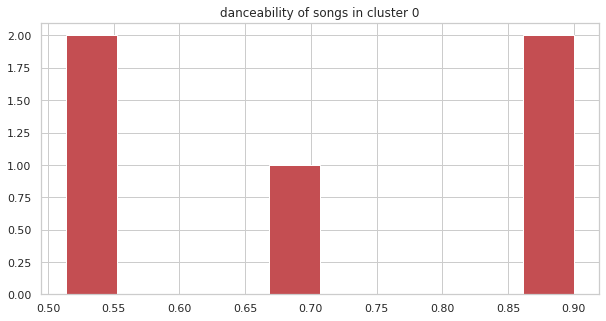

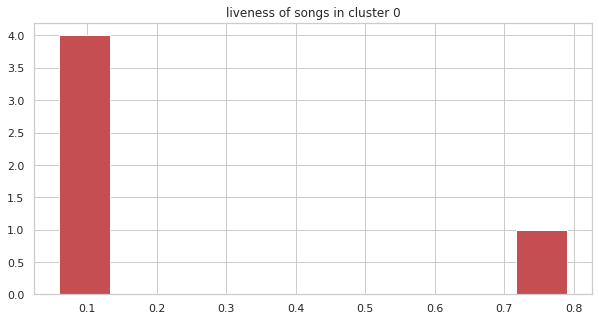

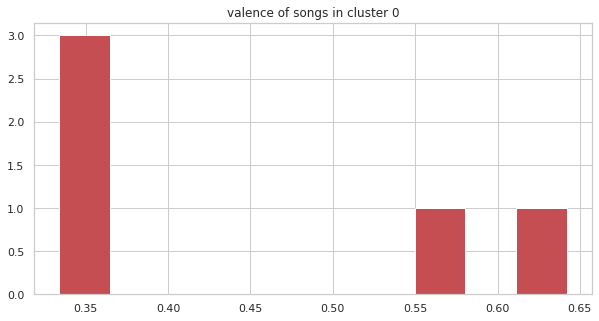

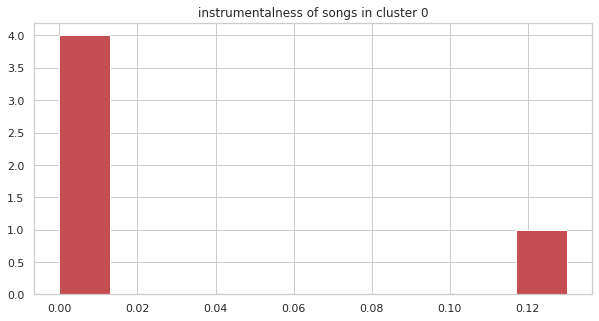

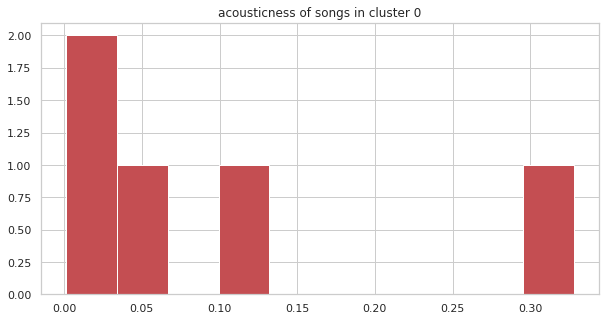

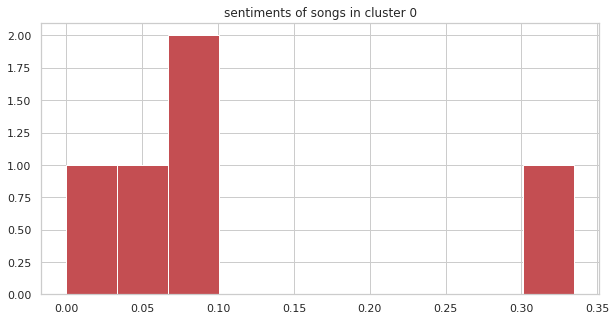

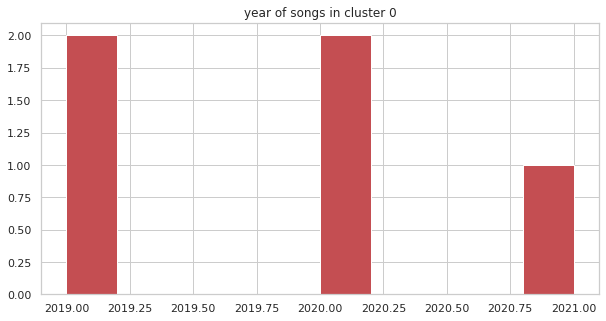

In [125]:
l0 = []
l1 = []
l2 = []
l3 = []
for k,v in enumerate(audio_features_df['id']):
    if y[k] == 0:
        l0.append(v)
    elif y[k] == 1:
        l1.append(v)
    elif y[k] == 2:
        l2.append(v)
    else:
        l3.append(v)
        
        
print(l0) #cluster 0
for feature in features:
    plt.subplot(audio_features_df.loc[:,feature][audio_features_df['label'] == 0].hist(color='r', figsize=(10,5)))
    plt.title("%s of songs in cluster 0" % feature)
    plt.show()

plt.subplot(audio_features_df.loc[:,"year"][audio_features_df['label'] == 0].hist(color='r', figsize=(10,5)))
plt.title("year of songs in cluster 0" )
plt.show()

mean_cluster0 = audio_features_df.loc[:,features][audio_features_df['label'] == 0].mean()

[1, 3, 5, 6, 9, 10, 12, 14, 15, 16, 17, 19, 21, 24, 25, 26, 27, 29, 30]


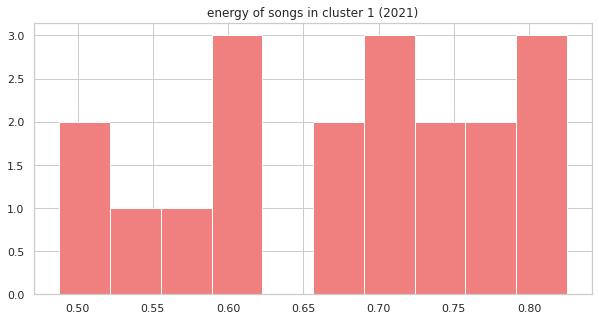

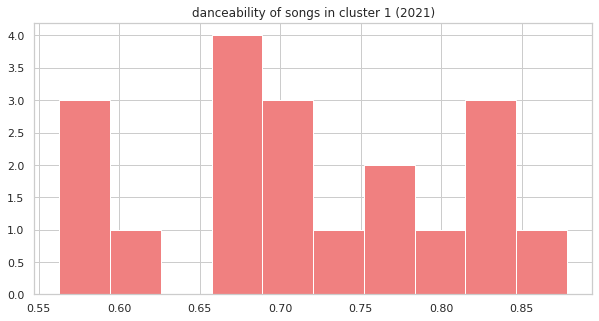

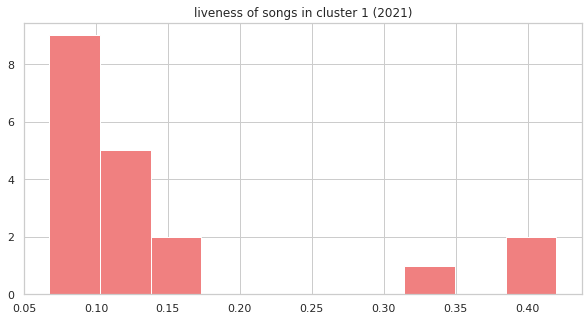

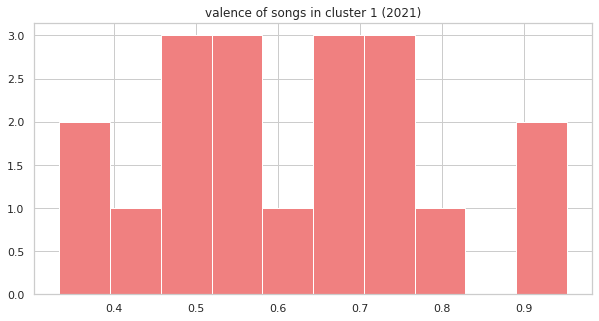

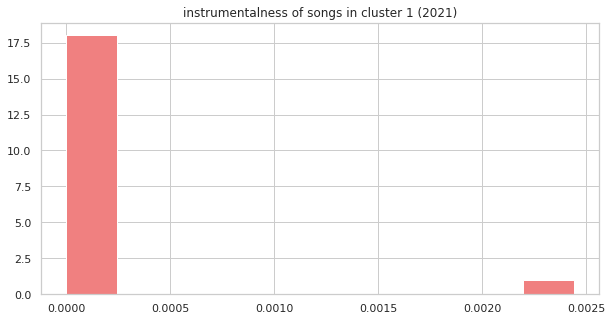

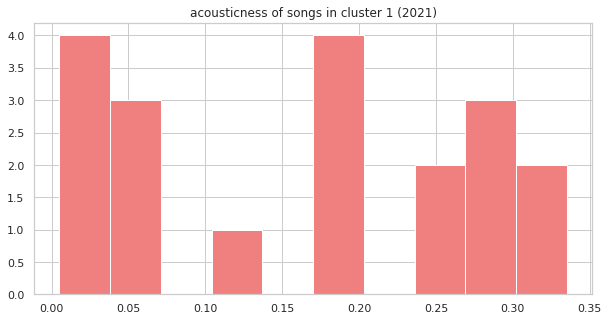

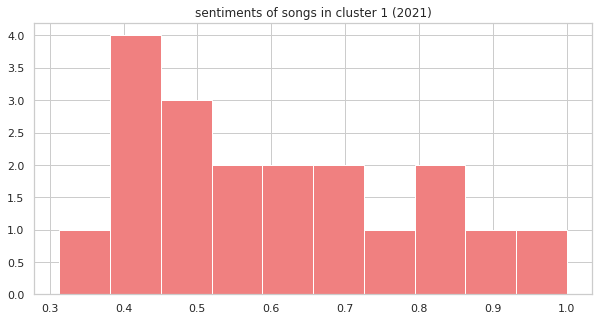

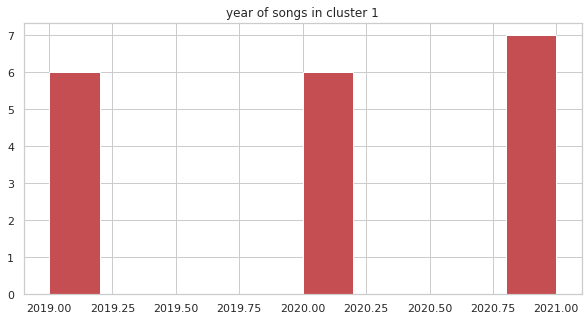

In [126]:
print(l1) #cluster 1
for feature in features:
    plt.subplot(audio_features_df.loc[:,feature][audio_features_df['label'] == 1].hist(color='lightcoral',
                                                                                       figsize=(10,5)))
    plt.title("%s of songs in cluster 1 (2021)" % feature)
    plt.show()

plt.subplot(audio_features_df.loc[:,"year"][audio_features_df['label'] == 1].hist(color='r', figsize=(10,5)))
plt.title("year of songs in cluster 1" )
plt.show()

mean_cluster1 = audio_features_df.loc[:,features][audio_features_df['label'] == 1].mean()

[2, 7, 18, 20, 28]


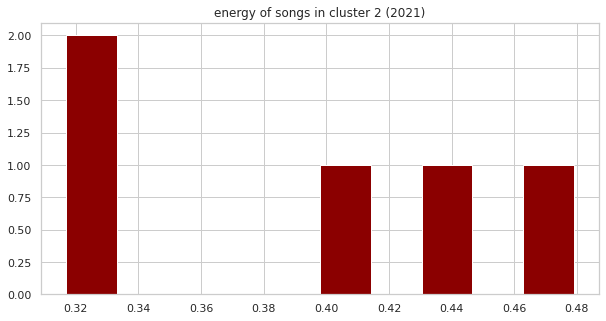

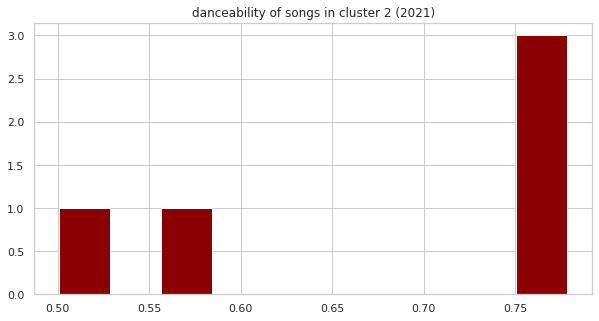

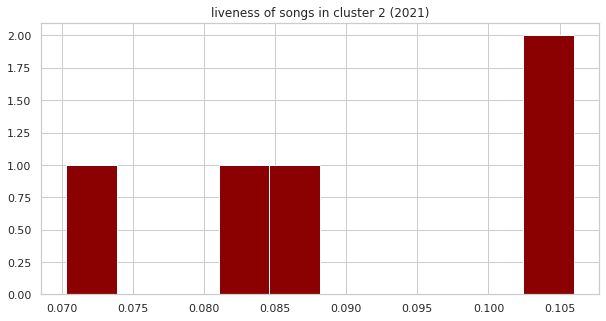

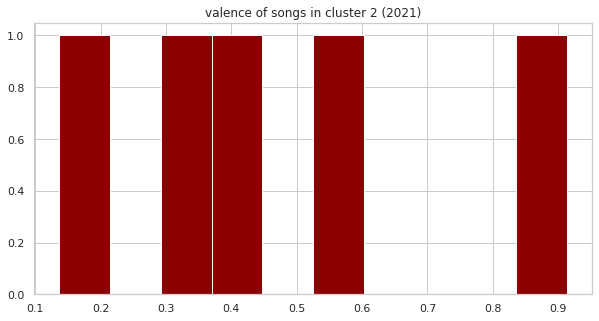

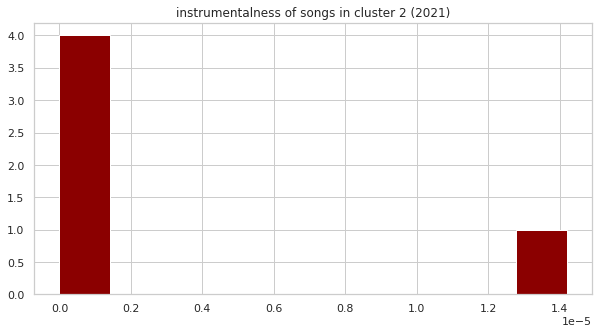

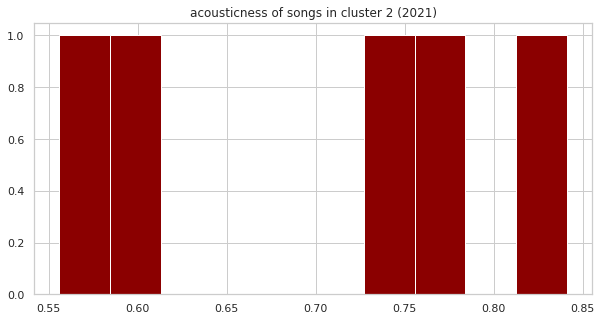

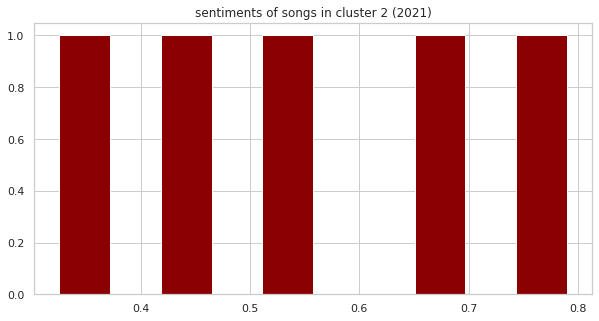

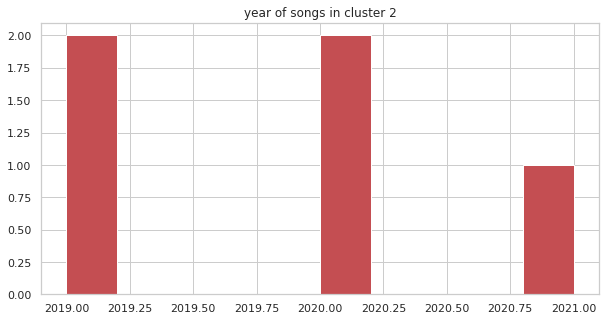

In [127]:
print(l2) #cluster 2
for feature in features:
    plt.subplot(audio_features_df.loc[:,feature][audio_features_df['label'] == 2].hist(color='darkred',
                                                                                       figsize=(10,5)))
    plt.title("%s of songs in cluster 2 (2021)" % feature)
    plt.show()
    
plt.subplot(audio_features_df.loc[:,"year"][audio_features_df['label'] == 2].hist(color='r', figsize=(10,5)))
plt.title("year of songs in cluster 2" )
plt.show()

mean_cluster2 = audio_features_df.loc[:,features][audio_features_df['label'] == 2].mean()

[22]


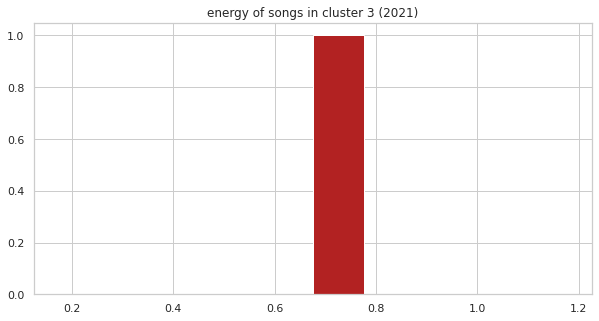

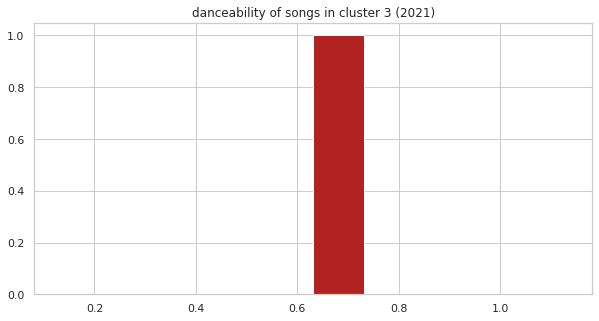

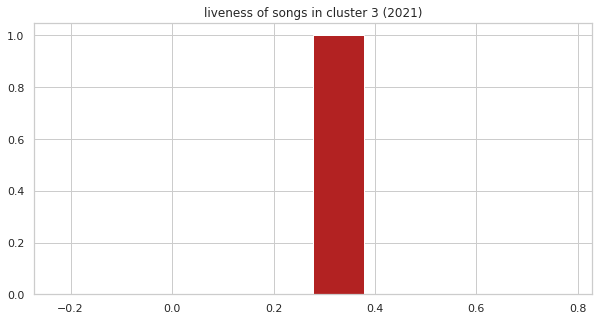

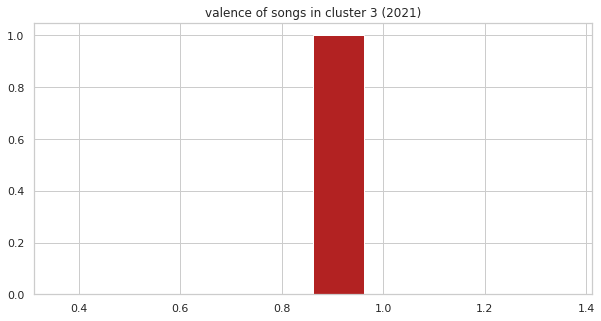

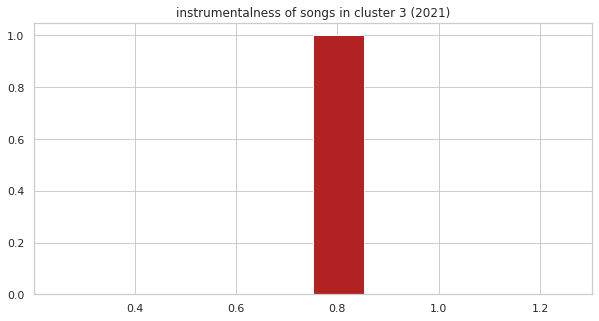

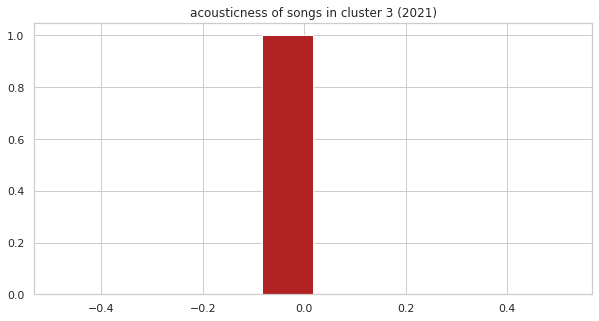

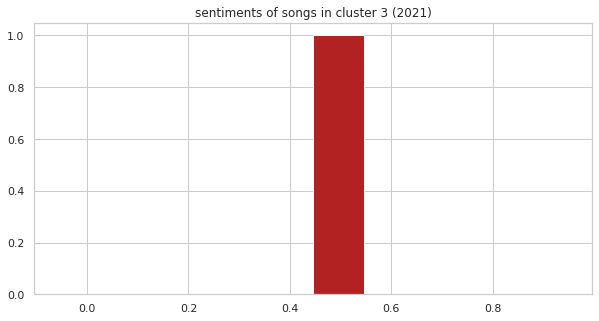

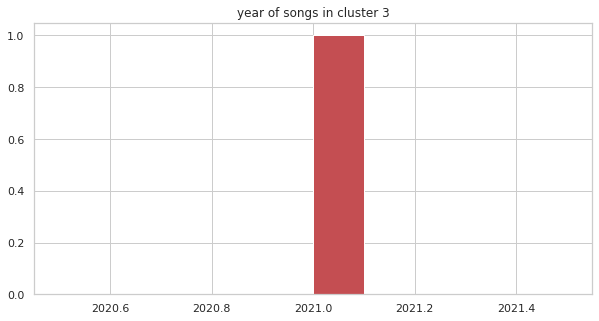

In [128]:
print(l3) #cluster 3
for feature in features:
    plt.subplot(audio_features_df.loc[:,feature][audio_features_df['label'] == 3].hist(color='firebrick',
                                                                                       figsize=(10,5)))
    plt.title("%s of songs in cluster 3 (2021)" % feature)
    plt.show()

plt.subplot(audio_features_df.loc[:,"year"][audio_features_df['label'] == 3].hist(color='r', figsize=(10,5)))
plt.title("year of songs in cluster 3" )
plt.show()
    
mean_cluster3 = audio_features_df.loc[:,features][audio_features_df['label'] == 3].mean()

In [114]:
mean_df = pd.DataFrame(mean_cluster0, columns=['Cluster 0'])
mean_df['Cluster 1'] = mean_cluster1
mean_df['Cluster 2'] = mean_cluster2
mean_df['Cluster 3'] = mean_cluster3
mean_df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3
energy,0.574200,0.674842,0.391800,0.676000
danceability,0.705000,0.716105,0.675000,0.631000
liveness,0.225860,0.150174,0.090300,0.278000
valence,0.443600,0.619895,0.483600,0.862000
instrumentalness,0.026038,0.000134,0.000003,0.752000
acousticness,0.097304,0.164293,0.701600,0.017600
sentiments,0.106206,0.608863,0.555610,0.445695


Insights:
- Cluster 0 is suitable for dancing, many songs are acoustic and they tend to be slow
- Cluster 1 has, majorly, fast/noisy songs and they don't tend to be cheerful
- Cluster 2 is the most suitable for dancing, many tracks are loud/noisy and they don't tend to cheerful
- Cluster 3 is suitable for dancing, tracks are majorly cheerful and loud/noisy

In [131]:
audio_features_df.loc[audio_features_df['label'] == 0]

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year,label
3,4,Bad Guy Billie Eilish,bad guy,Billie Eilish,0.425,0.701,0.1000,0.562,135.128,0.130000,0.32800,85,"['art pop', 'electropop', 'pop']",0.000000,2019,0
7,8,Talk Khalid,Talk (feat. Disclosure),Khalid,0.400,0.900,0.0599,0.346,135.984,0.000000,0.05160,73,"['pop', 'pop r&b']",0.334460,2019,0
10,11,Blinding Lights The Weeknd,Blinding Lights,The Weeknd,0.730,0.514,0.0897,0.334,171.005,0.000095,0.00146,91,"['canadian contemporary r&b', 'canadian pop', ...",0.077771,2020,0
12,13,The Box Roddy Ricch,The Box,Roddy Ricch,0.586,0.896,0.7900,0.642,116.971,0.000000,0.10400,82,"['melodic rap', 'rap', 'trap']",0.041029,2020,0
22,23,Blinding Lights The Weeknd,Blinding Lights,The Weeknd,0.730,0.514,0.0897,0.334,171.005,0.000095,0.00146,91,"['canadian contemporary r&b', 'canadian pop', ...",0.077771,2021,0


In [132]:
audio_features_df.loc[audio_features_df['label'] == 1]

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year,label
0,1,Old Town Road Lil Nas X Billy Ray Cyrus,Old Town Road - Remix,Lil Nas X,0.619,0.878,0.1130,0.639,136.041,0.000000,0.05330,81,"['lgbtq+ hip hop', 'pop']",0.431344,2019,1
2,3,Without Me Halsey,Without Me,Halsey,0.488,0.752,0.0936,0.533,136.041,0.000009,0.29700,79,"['dance pop', 'electropop', 'etherpop', 'indie...",0.392288,2019,1
4,5,Wow Post Malone,Wow.,Post Malone,0.539,0.829,0.1030,0.388,99.960,0.000002,0.13600,80,"['dfw rap', 'melodic rap', 'rap']",0.779044,2019,1
5,6,Happier Marshmello and Bastille,Happier,Marshmello,0.792,0.687,0.1670,0.671,100.011,0.000000,0.19100,25,"['brostep', 'dance pop', 'edm', 'pop', 'pop da...",0.662268,2019,1
8,9,Sicko Mode Travis Scott,SICKO MODE,Travis Scott,0.730,0.834,0.1240,0.446,155.008,0.000000,0.00513,83,"['hip hop', 'rap', 'slap house']",0.506228,2019,1
9,10,Sucker Jonas Brothers,Sucker,Jonas Brothers,0.734,0.842,0.1060,0.952,137.958,0.000000,0.04270,81,"['boy band', 'dance pop', 'pop', 'post-teen pop']",0.313236,2019,1
11,12,Circles Post Malone,Circles,Post Malone,0.762,0.695,0.0863,0.553,120.042,0.002440,0.19200,86,"['dfw rap', 'melodic rap', 'rap']",0.477232,2020,1
13,14,Don't Start Now Dua Lipa,Don't Start Now,Dua Lipa,0.793,0.793,0.0951,0.679,123.950,0.000000,0.01230,83,"['dance pop', 'pop', 'uk pop']",0.557679,2020,1
14,15,Rockstar DaBaby Roddy Ricch,ROCKSTAR (feat. Roddy Ricch),DaBaby,0.690,0.746,0.1010,0.497,89.977,0.000000,0.24700,82,"['north carolina hip hop', 'rap', 'trap']",0.428923,2020,1
15,16,Adore You Harry Styles,Adore You,Harry Styles,0.771,0.676,0.1020,0.569,99.048,0.000007,0.02370,85,['pop'],0.635481,2020,1


In [133]:
audio_features_df.loc[audio_features_df['label'] == 2]

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year,label
1,2,Sunflower Post Malone and Swae Lee,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,0.479,0.760,0.0703,0.913,89.911,0.000000,0.556,84,"['dfw rap', 'melodic rap', 'rap']",0.325720,2019,2
6,7,7 Rings Ariana Grande,7 rings,Ariana Grande,0.317,0.778,0.0881,0.327,140.048,0.000000,0.592,85,"['dance pop', 'pop']",0.659706,2019,2
17,18,Memories Maroon 5,Memories,Maroon 5,0.327,0.775,0.0821,0.595,91.050,0.000000,0.841,86,"['pop', 'pop rock']",0.789623,2020,2
19,20,Someone You Loved Lewis Capaldi,Someone You Loved,Lewis Capaldi,0.405,0.501,0.1050,0.446,109.891,0.000000,0.751,86,"['pop', 'uk pop']",0.458776,2020,2
27,28,Drivers License Olivia Rodrigo,drivers license,Olivia Rodrigo,0.431,0.561,0.1060,0.137,143.875,0.000014,0.768,90,['pop'],0.544224,2021,2


In [134]:
audio_features_df.loc[audio_features_df['label'] == 3]

,id,songs,song,artist,energy,danceability,liveness,valence,tempo,instrumentalness,acousticness,popularity,genres,sentiments,year,label
21,22,Save Your Tears The Weeknd and Ariana Grande,Save Your Tears (Remix) [Originally Performed ...,Vox Freaks,0.676,0.631,0.278,0.862,117.211,0.752,0.0176,13,[],0.445695,2021,3
